**Import important libraries**

This section imports essential Python libraries and modules used in the project.<br>
Libraries such as NumPy, OpenCV (cv2), and PyTorch are commonly used for data manipulation, image processing, and deep learning.<br>
The project also uses libraries for visualization (matplotlib), dataset handling (Pandas), and progress tracking (tqdm).<br>
The code sets a random seed for reproducibility.
It lists the content of the directory "../data."

In [1]:
import numpy as np
import pandas as pd 
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
seed(123)
import os
import random
import seaborn as sns
import cv2
from PIL import Image
import torch
from torchvision import transforms, utils
from tqdm.auto import tqdm
import glob as gb 
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
print(os.listdir("../data"))

['AkhilProject.ipynb', 'archive', 'Research_SelfCar.docx']


C:\Users\Akhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The code block below uses os.walk to traverse the directory structure and lists the files in the "archive" directory.
This will be helpful for understanding the structure of the dataset.

In [2]:
for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/dataA\dataA\CameraRGB\02_00_000.png
archive/dataA\dataA\CameraRGB\02_00_001.png
archive/dataA\dataA\CameraRGB\02_00_010.png
archive/dataA\dataA\CameraRGB\02_00_011.png
archive/dataA\dataA\CameraRGB\02_00_020.png
archive/dataA\dataA\CameraRGB\02_00_021.png
archive/dataA\dataA\CameraRGB\02_00_030.png
archive/dataA\dataA\CameraRGB\02_00_031.png
archive/dataA\dataA\CameraRGB\02_00_040.png
archive/dataA\dataA\CameraRGB\02_00_041.png
archive/dataA\dataA\CameraRGB\02_00_050.png
archive/dataA\dataA\CameraRGB\02_00_051.png
archive/dataA\dataA\CameraRGB\02_00_060.png
archive/dataA\dataA\CameraRGB\02_00_061.png
archive/dataA\dataA\CameraRGB\02_00_070.png
archive/dataA\dataA\CameraRGB\02_00_071.png
archive/dataA\dataA\CameraRGB\02_00_080.png
archive/dataA\dataA\CameraRGB\02_00_081.png
archive/dataA\dataA\CameraRGB\02_00_090.png
archive/dataA\dataA\CameraRGB\02_00_091.png
archive/dataA\dataA\CameraRGB\02_00_100.png
archive/dataA\dataA\CameraRGB\02_00_101.png
archive/dataA\dataA\CameraRGB\02

**Get the imageset**

Creating lists of image and mask paths for multiple datasets (A, B, C, D, E) will be based on their respective directories.<vr>
It assumes a specific dataset structure and helps organize the data for training.

In [3]:
image_path = ["archive/"+"data"+i+"/"+"data"+i+"/CameraRGB/" for i in ['A', 'B', 'C', 'D', 'E']]
mask_path = ["archive/"+"data"+i+"/"+"data"+i+"/CameraSeg/" for i in ['A', 'B', 'C', 'D', 'E']]

(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)
(600, 800, 3)


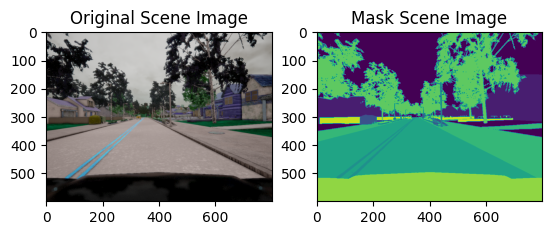

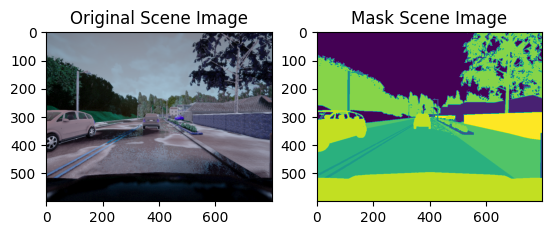

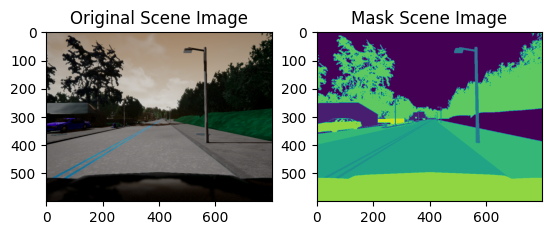

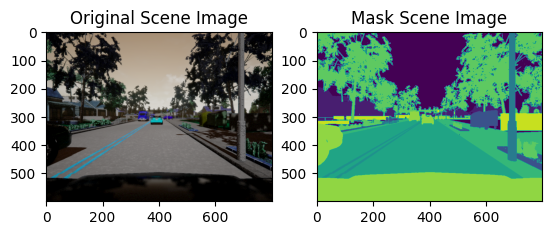

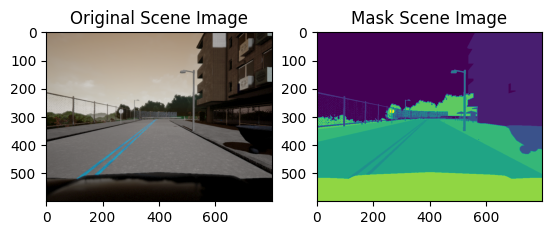

In [4]:
def display_original_image_vs_mask():
    for i in range(5):
        img_path=image_path[i]
        mk_path=mask_path[i]
        img_name=random.choice(os.listdir(img_path))
        img=cv2.imread(os.path.join(img_path, img_name))
        mask=cv2.imread(os.path.join(mk_path, img_name))
        fig, arr=plt.subplots(1,2)
        arr[0].imshow(img)
        arr[0].set_title('Original Scene Image')
        arr[1].imshow(mask[:,:,2])
        arr[1].set_title('Mask Scene Image')
        print(img.shape)
display_original_image_vs_mask()

A andom original scene image and its corresponding mask image are displayed above to understand differnce in scene.
It selects a dataset (A, B, C, D, or E), chooses an image at random, and displays it alongside its mask.<br>
It's useful for visualizing the dataset and understanding the format of the images and masks.

**Tuning**

Dataset_subfolders represents the subfolders for different datasets (A, B, C, D, E).
data_dir specifies the main data directory.
IMG_SIZE sets the desired image size (512x512), which is commonly used for image segmentation tasks.

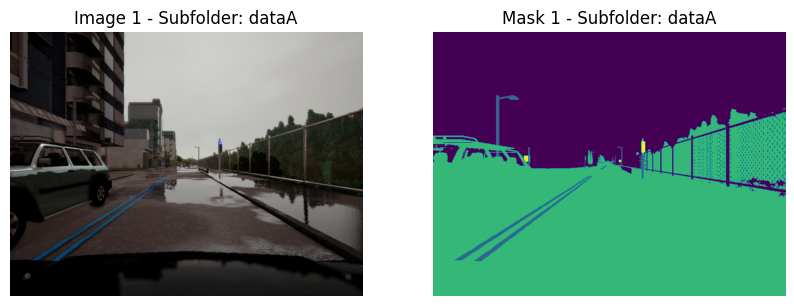

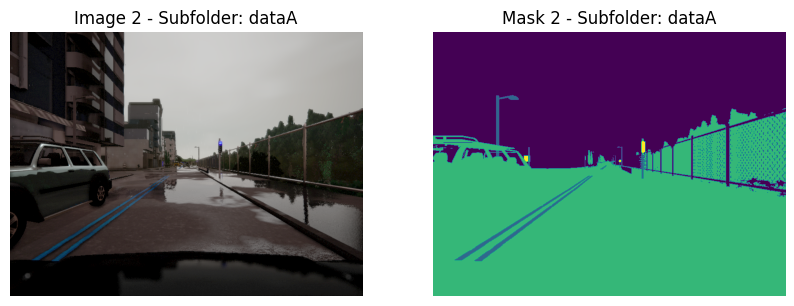

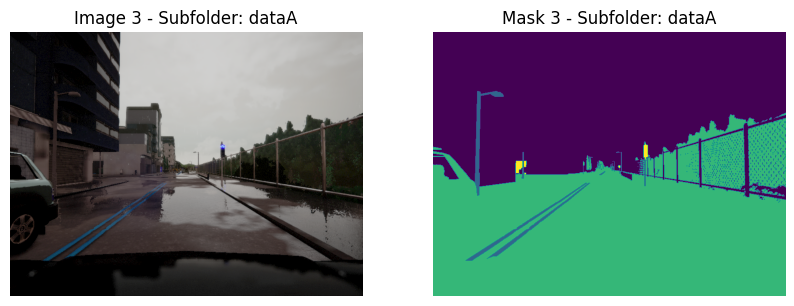

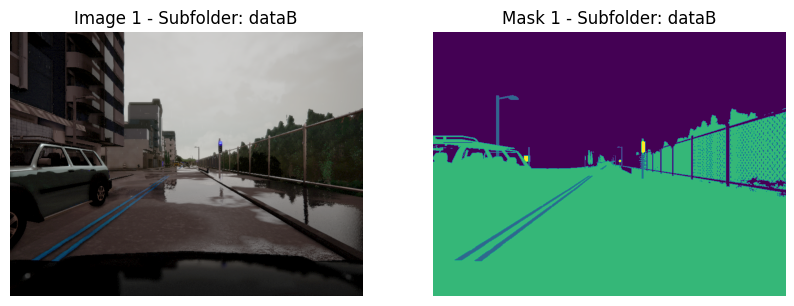

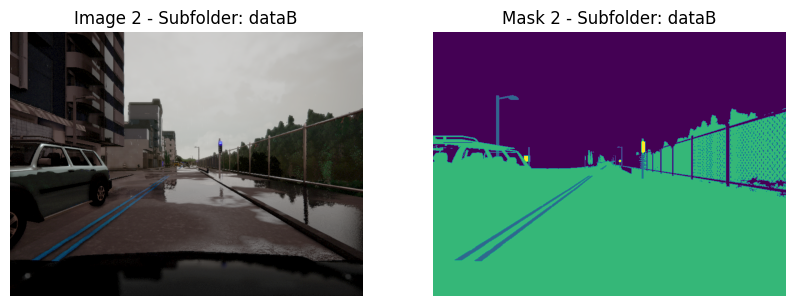

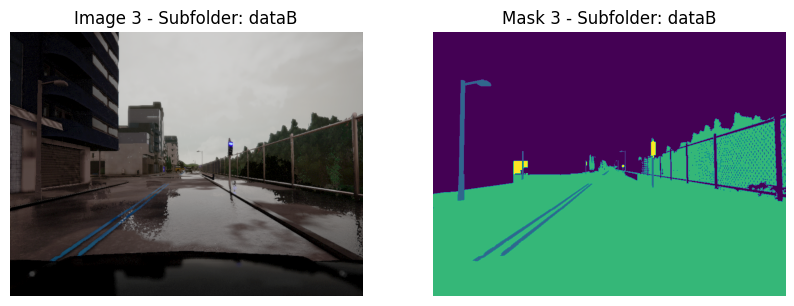

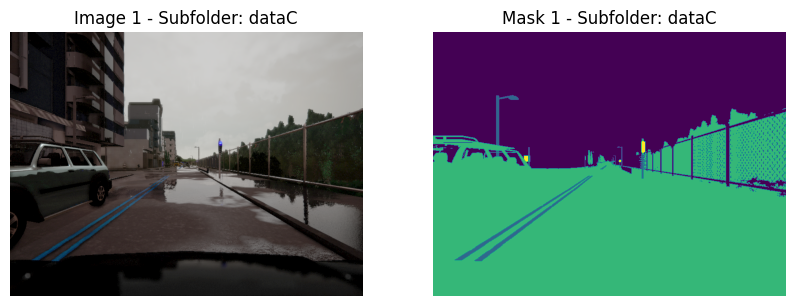

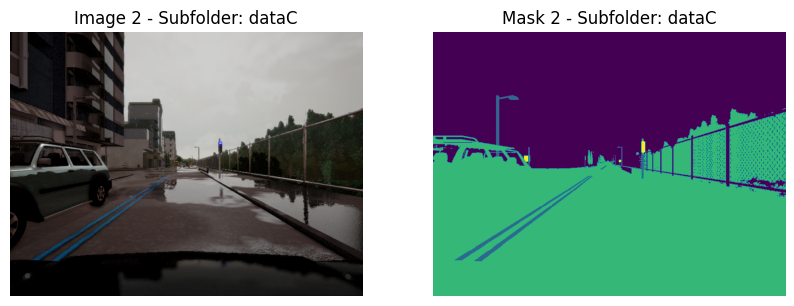

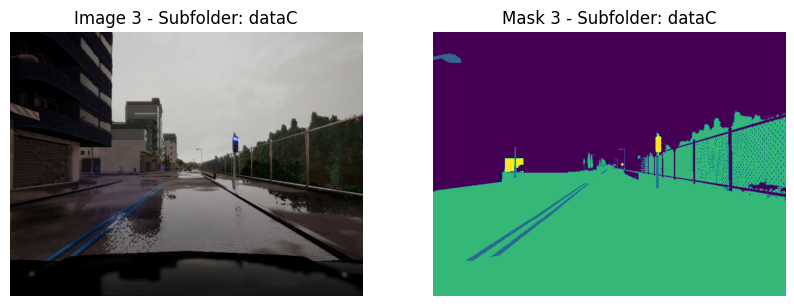

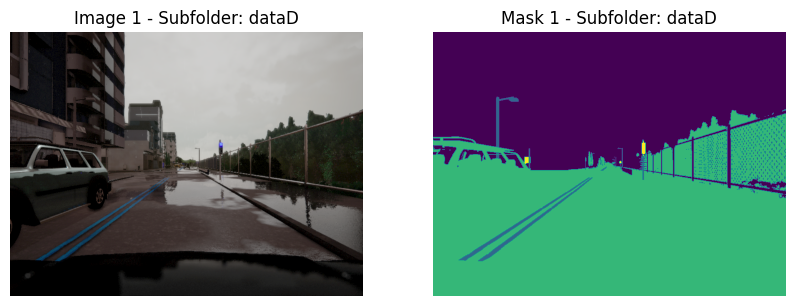

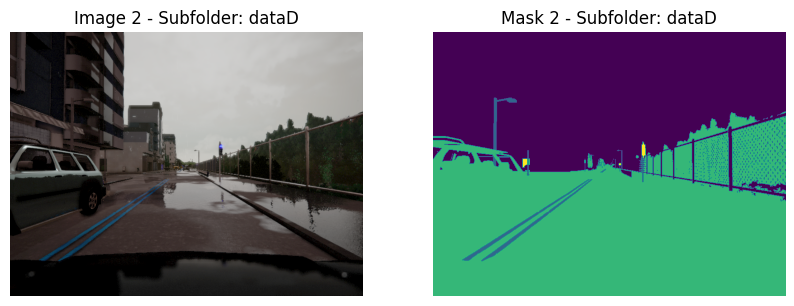

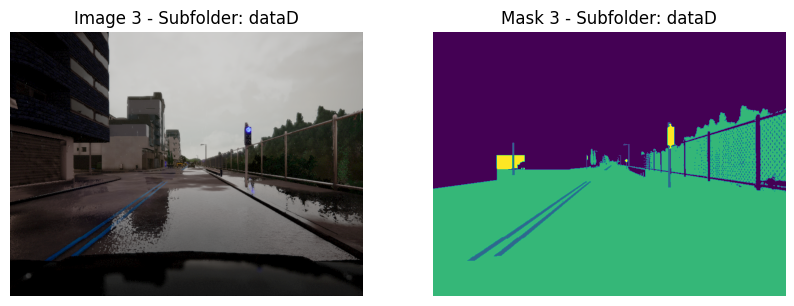

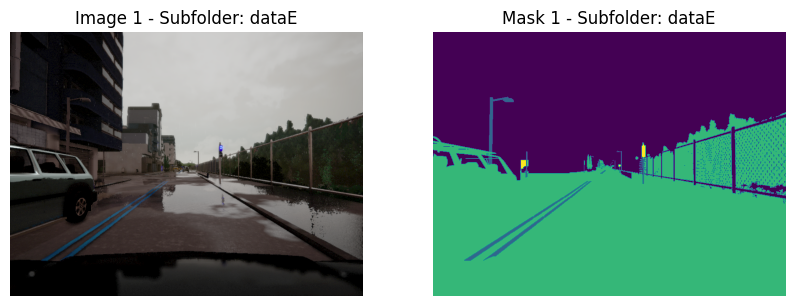

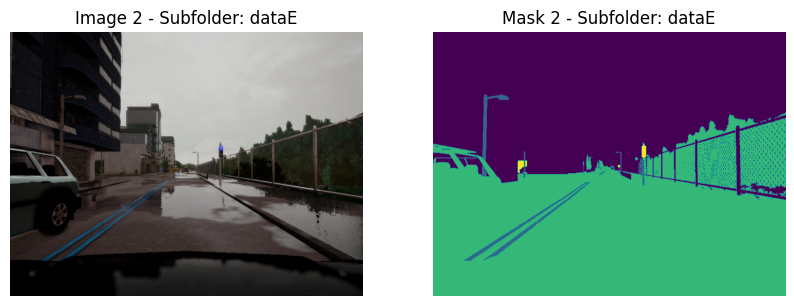

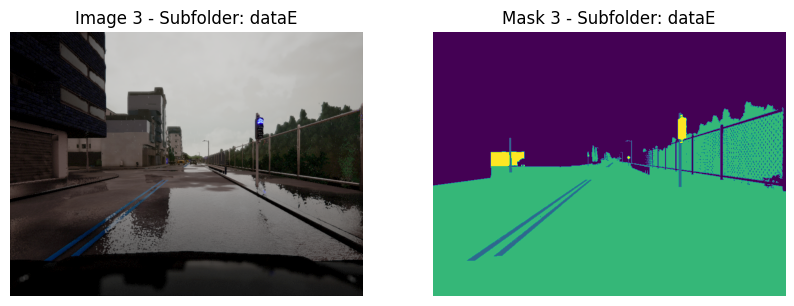

In [5]:
dataset_subfolders = ['dataA', 'dataB', 'dataC', 'dataD', 'dataE']
data_dir = "archive"
IMG_SIZE = 512

def plot_specific_subfolder_fxn(dataset , dataset_subfolders) : 
    for sub in dataset_subfolders : 
        imgfolder_path = os.path.join(dataset , sub , sub , 'CameraRGB')
        maskfolder_path = os.path.join(dataset , sub , sub , 'CameraSeg')
        img_files = os.listdir(imgfolder_path) 
        mask_files = os.listdir(maskfolder_path)
        
        for i in range(3) : 
            img_path = os.path.join(imgfolder_path , img_files[i])
            mask_path = os.path.join(maskfolder_path , mask_files[i])
            img = cv2.cvtColor(cv2.imread(img_path) , cv2.COLOR_BGR2RGB)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Image {i+1} - Subfolder: {sub}')
            plt.axis('off')
            plt.subplot(1, 2, 2)
            plt.imshow(mask)
            plt.title(f'Mask {i+1} - Subfolder: {sub}')
            plt.axis('off')
            plt.show()
plot_specific_subfolder_fxn(data_dir , dataset_subfolders)

In [6]:
images_paths = [] 
masks_paths = [] 
for sub in tqdm(dataset_subfolders) : 
    img_files = sorted(gb.glob(os.path.join(str(data_dir + "/" + dataset_subfolders[1] + "/" + dataset_subfolders[1] + "/" + 'CameraRGB') , "*")))
    for file in img_files : 
        images_paths.append(file) 
    mask_files = sorted(gb.glob(os.path.join(str(data_dir + "/" + dataset_subfolders[1] + "/" + dataset_subfolders[1] + "/" + 'CameraSeg') , "*")))
    for file in mask_files : 
        masks_paths.append(file)

100%|██████████| 5/5 [00:00<00:00, 104.74it/s]


The function above loops through the subfolders within dataset_subfolders and appends image and mask file paths to images_paths and masks_paths, respectively.
This organizes the data for later use in training and testing.

In [7]:
len(images_paths) , len(masks_paths)

(5000, 5000)

**Image Training**

In [8]:
train_images , test_images , train_masks , test_masks = train_test_split(images_paths , masks_paths , test_size = 0.2)

The model utilized in this code is a UNet architecture, which is a widely used deep learning model for image segmentation tasks. The UNet architecture consists of two key components: an encoder path and a decoder path. <br>The encoder path downsamples the input image, extracting features at various scales, while the decoder path subsequently upscales this representation to generate a detailed segmentation map. Within these paths, convolutional layers, batch normalization, and rectified linear unit (ReLU) activation functions are employed to capture and represent image features.<br> 

In [9]:
class DataStandard(Dataset) : 
    def __init__(self, img_path , mask_path) : 
        self.img_path = img_path 
        self.mask_path = mask_path
        self.transform = transforms.Compose([
            transforms.Resize(size = (IMG_SIZE , IMG_SIZE)) , 
            ToTensor()
        ])
        if len(self.img_path) != len(self.mask_path) : 
            raise InvalidDatasetException(self.img_path , self.mask_path)
    def __getitem__(self , idx) : 
        image = Image.open(self.img_path[idx])
        tensor_image = self.transform(image)
        mask = Image.open(self.mask_path[idx])
        tensor_mask = self.transform(mask)
        return tensor_image , tensor_mask
    def __len__(self) : 
        return len(self.img_path)

In [10]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor , CenterCrop
train_set = DataStandard(train_images , train_masks)
print(f"Total train set images : {train_set.__len__()}")

Total train set images : 4000


In [11]:
filer_train=train_set.__getitem__(1000)
filer_train[0].shape , filer_train[1].shape

(torch.Size([3, 512, 512]), torch.Size([3, 512, 512]))

In [12]:
test_set = DataStandard(test_images , test_masks)
print(f"Total test set images : {test_set.__len__()}")

Total test set images : 1000


In [13]:
filer_test=test_set.__getitem__(10)
filer_test[0].shape , filer_test[1].shape

(torch.Size([3, 512, 512]), torch.Size([3, 512, 512]))

**Dataloaders**

In [14]:
BATCH_SIZE = 8
torch.manual_seed(42)
train_dataloader = DataLoader(
    dataset = train_set , 
    batch_size = BATCH_SIZE , 
    shuffle = True
)
torch.manual_seed(42)
test_dataloader = DataLoader(
    dataset = test_set , 
    batch_size = 10 , 
    shuffle = False
)

In [15]:
print(f"Dataset Train Dataloader {len(train_dataloader)} batch size {BATCH_SIZE}")

Dataset Train Dataloader 500 batch size 8


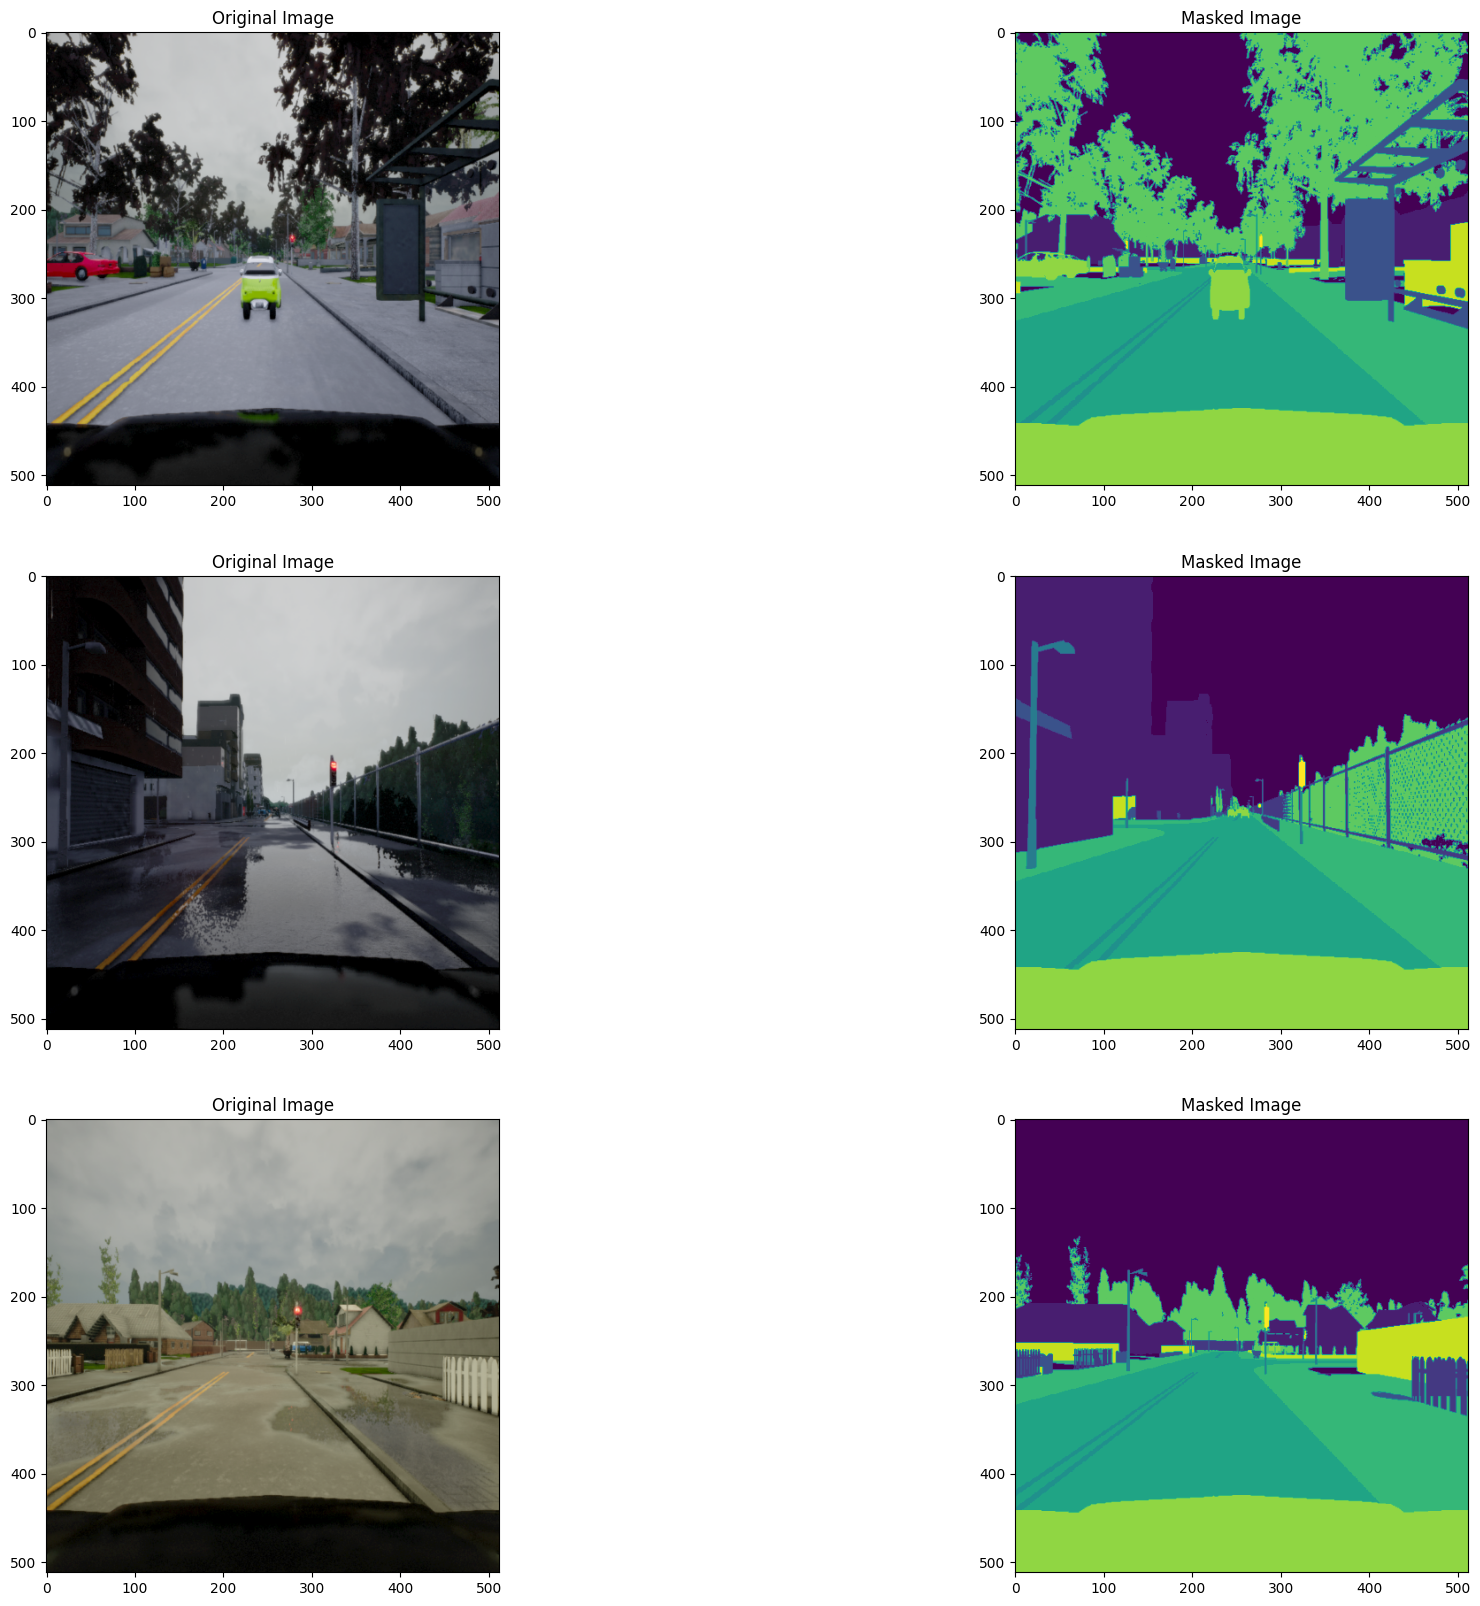

In [16]:
trainimage_sample , trainmask_sample = next(iter(train_dataloader))
trainimage_sample.shape , trainmask_sample.shape
fig , axis = plt.subplots(3 , 2 , figsize = (25,20)) 
for i in range(3): 
    img1 = trainimage_sample[i].numpy()
    img1 = np.transpose(img1, (1,2,0))
    axis[i, 0].imshow(img1)
    axis[i, 0].set(title = f"Original Image")
    img2 = trainmask_sample[i].numpy()
    img2 = np.transpose(img2, (1,2,0))
    axis[i, 1].imshow(img2[:,:,0])
    axis[i, 1].set(title = f"Masked Image")
plt.subplots_adjust(wspace=0.0)

**Model Building**

Skip connections are used to connect corresponding layers in the encoder and decoder, preserving fine-grained details during the upsampling process. Ultimately, a final convolutional layer with a kernel size of 1 is employed to produce the predicted mask.<br> The model uses the Binary Cross-Entropy with Logits Loss as its loss function, and the Adam optimizer is employed for parameter updates. It can run on either a GPU (if available) or CPU, depending on the device's capabilities.

In [17]:
import torch.nn as nn 

class ConvolutionStructure(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ConvolutionStructure, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),    
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    def forward(self, x: torch.Tensor):
        return self.block(x)

This class represents a basic building block for convolutional layers within the neural network. It is used to capture and learn features from the input data. <br>This structure consists of two convolutional layers, each followed by batch normalization and rectified linear unit (ReLU) activation. These convolutional layers detect different features in the image data by applying small filters (kernels) to it.

In [18]:
class networkpush(nn.Module):
    def forward(self, x: torch.Tensor, skip_connection: torch.Tensor):
        _, _, h, w = skip_connection.shape
        crop = CenterCrop((h, w))(x)
        residual = torch.cat((x, crop), dim=1)
        return residual

Skip connections are a crucial part of the UNet architecture. They connect layers from the encoder (downsampling) path to corresponding layers in the decoder (upsampling) path.
<br>This connection allows the model to maintain fine-grained details during the upsampling process. Skip connections are a fundamental technique for improving segmentation results, particularly for preserving object boundaries and intricate patterns.

In [19]:
class UNET(nn.Module) : 
    def __init__(self , in_channels, out_channels) : 
        super().__init__() 
        self.encoders = nn.ModuleList([
            ConvolutionStructure(in_channels, 64),
            ConvolutionStructure(64, 128),
            ConvolutionStructure(128, 256),
            ConvolutionStructure(256, 512),
        ])
        
        self.pool = nn.MaxPool2d(2)
        self.networkpush = networkpush()
        self.decoders = nn.ModuleList([
            ConvolutionStructure(1024, 512),
            ConvolutionStructure(512, 256),
            ConvolutionStructure(256, 128),
            ConvolutionStructure(128, 64),
        ])
        self.up_samples = nn.ModuleList([
            nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        ])
        self.bottleneck = ConvolutionStructure(512, 1024)
        self.finalconv = nn.Conv2d(64, out_channels, kernel_size=1, stride=1)
    def forward(self , x ) : 
        skip_connections = []
        for enc in self.encoders:
            x = enc(x)
            skip_connections.append(x)
            x = self.pool(x)
        x = self.bottleneck(x)
        for idx, dec in enumerate(self.decoders):
            x = self.up_samples[idx](x)
            skip_connection = skip_connections.pop()
            x = self.networkpush(x, skip_connection)
            x = dec(x)
        x = self.finalconv(x) 
        return x

The UNet model consists of two parts: the encoder and the decoder. The encoder consists of a sequence of convolutional structures with varying numbers of channels (64, 128, 256, and 512) and a max-pooling operation.<br> 

The decoder, on the other hand, consists of convolutional structures with decreasing numbers of channels (512, 256, 128, and 64) and transposed convolutional layers (sometimes called "up-sampling" layers) to increase the spatial resolution.<br>

The bottleneck layer connects the encoder and decoder and serves as the central feature representation. Finally, a 1x1 convolutional layer is used to produce the predicted mask.

In [20]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
model=UNET(
    in_channels= 3 , 
    out_channels=3
).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

Before defining the model, the code checks the availability of GPU or other hardware acceleration for computation. 

It uses the torch.cuda.is_available() function to determine whether a GPU is accessible. If available, the model is set to run on the GPU; otherwise, it runs on the CPU.

In [21]:
epochs = 40
training_loss = [] 

for i in tqdm(range(epochs)) : 
    epoch_loss = 0 
    for batch , (image , mask) in enumerate(train_dataloader) : 
        image , mask = image.to(device) , mask.to(device)
        mask_pred = model(image) 
        loss = criterion(mask_pred , mask)
        if batch % 500 == 0:
            print(f"Sample scene image recognition {batch * len(image)}/{len(train_dataloader.dataset)} view.") 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad() 
        epoch_loss +=loss.item()
    training_loss.append((epoch_loss/len(train_dataloader)))
    print(f"Epoch  : {i+1} , Loss: {(epoch_loss/len(train_dataloader))}\n\n")

  0%|          | 0/40 [00:00<?, ?it/s]

Sample scene image recognition 0/4000 view.


In [ ]:
print(f"Training set loss: {training_loss[-1]}")

In [ ]:
plt.plot(range(epochs) , training_loss,color="red",label="Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

a loss function is essential for quantifying the difference between the model's predictions and the actual data. In this code, the Binary Cross-Entropy with Logits Loss (BCEWithLogitsLoss) is selected as the loss function.<br>

This is a common choice for binary image segmentation tasks, and it measures the dissimilarity between predicted values and true labels. The Adam optimizer is used to adjust the model's parameters based on the computed gradients, making the model progressively better at its task.

**PerformanceEvaluation**

In [ ]:
test_loss = 0
with torch.no_grad() : 
    for image , mask in tqdm(test_dataloader) : 
        image , mask = image.to(device) , mask.to(device)
        mask_pred = model(image)
        loss = criterion(mask_pred , mask) 
        test_loss += loss
test_loss/=len(test_dataloader)
print(f"Testing set loss: {test_loss}\n")

After training, the code proceeds to evaluate the model's performance on a test dataset. The test dataset is different from the training data, and the code calculates the loss on this dataset. 

This test loss is an important metric for assessing how well the model generalizes to unseen data. A lower test loss implies that the model is effective in making accurate predictions on new, unseen images.

In [ ]:
def image_prediction_figure_plot(img_sample , mask_sample , val_pred):
    fig , axis = plt.subplots(8 , 3 , figsize = (20,20)) 
    for i in range(8): 
        img1 = img_sample[i].numpy()
        img1 = np.transpose(img1, (1,2,0))
        axis[i, 0].imshow(img1)
        axis[i, 0].set(title = f"Original Scene Image")
        img2 = mask_sample[i].numpy()
        img2 = np.transpose(img2, (1,2,0))
        axis[i, 1].imshow(img2[:,:,0])
        axis[i, 1].set(title = f"Masked Scene Image")
        img3 = val_pred[i].cpu().numpy()
        img3 = np.transpose(img3, (1,2,0))
        axis[i, 2].imshow(img3[:,:,0])
        axis[i, 2].set(title = f"Predicted Mask Image")
    plt.subplots_adjust(wspace=0.5)
with torch.no_grad() : 
        img_sample , mask_sample = next(iter(test_dataloader)) 
        img_sample , mask_sample = img_sample.to(device) , mask_sample.to(device) 
        test_pred = model(img_sample)
        image_prediction_figure_plot(img_sample.cpu() , mask_sample.cpu() , test_pred.detach())
torch.save(model.state_dict(), 'SelfDrivingCarScenePredictionModel.pt')

a sample of images and their corresponding masks and displays the original scene image, the masked image, and the model's predicted mask image.

This visualization aids in understanding the model's performance qualitatively.after training and evaluating the model, the code saves its learned parameters to a file (in this case, 'SelfDrivingCarScenePredictionModel.pt'). This allows the model to be reused later for making predictions without retraining.